## Importing libraries

In [1]:
from bs4 import BeautifulSoup
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt

# Web scraping from: https://wine.com
**The url_constructor function takes a page number and a URL as input, and it returns a new URL by splitting the original URL around the string**

In [2]:
def url_contructor(page_number, url):
    first = url.split('7155', 1)[0]
    second = url.split('7155',1)[1]
    url = first + '7155/' + str(page_number) + second
    return url

**The web_scrap function is a web scraper that collects data from a website that displays information about wine products.**

In [3]:
def web_scrap():
    page = 0
    url_df = []
    web_data = {'product_name': [],
                'year':[],
                'varietal': [],
                'origin': [],
                'price': [],
                'rating': [],
                'rating_count':[]}
    df = pd.DataFrame(data=web_data)
    url = 'https://www.wine.com/list/wine/7155?pricemin=10&ratingmin=89'
    for x in range(1, 150):
        try:
            page += 1
            url_df.append(url_contructor(page, url))
        except Exception:
            continue
    for link in url_df:
        r = requests.get(link)
        soup = BeautifulSoup(r.content, 'html.parser')
        all_li = soup.find_all('li', {'class': 'prodItem'})
        for li in all_li:
            product_name = li.find('span', class_= 'prodItemInfo_name').string
            year = product_name.split()[-1]
            product_name = product_name.rsplit(' ', 1)[0]
            price = li.find('span', class_='productPrice_price-regWhole').string
            varietal = li.find('span', class_='prodItemInfo_varietal').string
            origin = li.find('span', class_='prodItemInfo_originText').string
            origin = origin.split()[-1]
            rating = li.find('span', class_='averageRating_average').string
            rating_count = li.find('span', class_='averageRating_number').string
            series = [product_name,year,varietal,origin,price,rating,rating_count]
            df.loc[len(df)]=series
    return df

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import undetected_chromedriver as uc

def web_scrap_selenium():
    page = 0
    url_df = []
    web_data = {'product_name': [],
                'year':[],
                'varietal': [],
                'origin': [],
                'price': [],
                'rating': [],
                'rating_count':[]}
    df = pd.DataFrame(data=web_data)
    url = 'https://www.wine.com/list/wine/7155?pricemin=10&ratingmin=89'
    
    # Use Chrome webdriver
    driver = uc.Chrome()
    
    # Wait for the page to load
    wait = WebDriverWait(driver, 10)
    
    for x in range(1, 150):
        try:
            page += 1
            url_df.append(url_constructor(page, url))
        except Exception:
            continue
            
    for link in url_df:
        driver.get(link)
        
        # Wait until the page has finished loading
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "prodItem")))
        
        # Get the page source
        html = driver.page_source
        
        # Parse the page source with BeautifulSoup
        soup = BeautifulSoup(html, 'html.parser')
        
        # Find all product items on the page
        all_li = soup.find_all('li', {'class': 'prodItem'})
        
        # Extract the relevant information from each product item
        for li in all_li:
            product_name = li.find('span', class_= 'prodItemInfo_name').string
            year = product_name.split()[-1]
            product_name = product_name.rsplit(' ', 1)[0]
            price = li.find('span', class_='productPrice_price-regWhole').string
            varietal = li.find('span', class_='prodItemInfo_varietal').string
            origin = li.find('span', class_='prodItemInfo_originText').string
            origin = origin.split()[-1]
            rating = li.find('span', class_='averageRating_average').string
            rating_count = li.find('span', class_='averageRating_number').string
            
            # Add the extracted information to the DataFrame
            series = [product_name,year,varietal,origin,price,rating,rating_count]
            df.loc[len(df)]=series
            
    # Close the webdriver
    driver

**Run this command to update the DataFrame**

In [5]:
#df = web_scrap()

**Run this command to save the DataFrame**

In [6]:
#df.to_csv('wine.csv')

**Load the DataFrame**

In [7]:
df = pd.read_csv('wine.csv', index_col=0)
df

,product_name,year,varietal,origin,price,rating,rating_count
0,Dom Perignon Vintage with Gift Box,2012,Vintage Sparkling Wine,France,269,4.8,37
1,Robert Mondavi To Kalon Vineyard Reserve Caber...,2017,Cabernet Sauvignon,California,144,4.6,34
2,Chateau Fonbadet B de Fonbadet,2019,Bordeaux Red Blends,France,24,3.8,31
3,Joseph Phelps Cabernet Sauvignon,2019,Cabernet Sauvignon,California,89,4.5,46
4,Stag's Leap Wine Cellars Artemis Cabernet Sauv...,2019,Cabernet Sauvignon,California,77,4.4,72
...,...,...,...,...,...,...,...
3695,Wolffer Finca Wolffer Rose,2021,Rosé,Argentina,16,3.7,23
3696,Erath Leland Vineyard Pinot Noir,2018,Pinot Noir,Oregon,42,0.0,0
3697,Pendulum Cabernet Sauvignon,2020,Cabernet Sauvignon,Washington,16,4.1,7
3698,Chalk Hill Sonoma Coast Pinot Noir,2019,Pinot Noir,California,26,3.6,8


# Cleaning data for plots and machine learning

**Removing any rows where the value in the rating column is 0, and then it removes any rows where the value in the rating_count column is less than or equal to 18**

In [8]:
df = df[df['rating'] != 0]
df = df[df['rating_count'] > 18]

**The code performs several transformations on the DataFrame**  

In [9]:
df = df[pd.to_numeric(df['year'], errors='coerce').notnull()]
df['price']=df['price'].str.replace(',','')
df = df.astype({'price':'int'})
df = df.astype({'rating':'float'})
df['year'] = pd.to_numeric(df['year'])

**The code filters the DataFrame df by removing any rows where the value in the year column is less than or equal to 2000 or greater than or equal to 2021** 

In [10]:
df = df[df['year'] > 2000]
df = df[df['year'] < 2021]
df = df.reset_index(drop=True)

**Filter the DataFrame by removing any rows where the value in the varietal column does not appear in at least three other rows, and then remove any rows where the value in the origin column does not appear in at least three other rows**

In [11]:
df = df.groupby('varietal').filter(lambda x : len(x)>2).reset_index(drop=True)
df = df.groupby('origin').filter(lambda x : len(x)>2).reset_index(drop=True)

**Removing duplicates**

In [12]:
df = df.drop_duplicates(subset=['product_name'])

**Add two new columns to the DataFrame, called varietal_code and origin_code, which contain integer codes that represent the values in the varietal and origin columns, respectively**

In [13]:
df['varietal_code'] = df['varietal'].astype('category').cat.codes
df['origin_code'] = df['origin'].astype('category').cat.codes
df = df.reset_index(drop=True)
df

,product_name,year,varietal,origin,price,rating,rating_count,varietal_code,origin_code
0,Dom Perignon Vintage with Gift Box,2012,Vintage Sparkling Wine,France,269,4.8,37,34,5
1,Robert Mondavi To Kalon Vineyard Reserve Caber...,2017,Cabernet Sauvignon,California,144,4.6,34,4,3
2,Chateau Fonbadet B de Fonbadet,2019,Bordeaux Red Blends,France,24,3.8,31,1,5
3,Joseph Phelps Cabernet Sauvignon,2019,Cabernet Sauvignon,California,89,4.5,46,4,3
4,Stag's Leap Wine Cellars Artemis Cabernet Sauv...,2019,Cabernet Sauvignon,California,77,4.4,72,4,3
...,...,...,...,...,...,...,...,...,...
586,Tikal Patriota,2018,Other Red Blends,Argentina,21,3.8,33,18,1
587,Vigilance Cimarron,2017,Other Red Blends,California,12,3.7,120,18,3
588,William Hill North Coast Cabernet Sauvignon,2019,Cabernet Sauvignon,California,14,3.9,34,4,3
589,Selbach Oster Mosel Dry Pinot Blanc,2019,Pinot Blanc,Germany,24,4.1,40,21,6


# Plotting some usefull info 

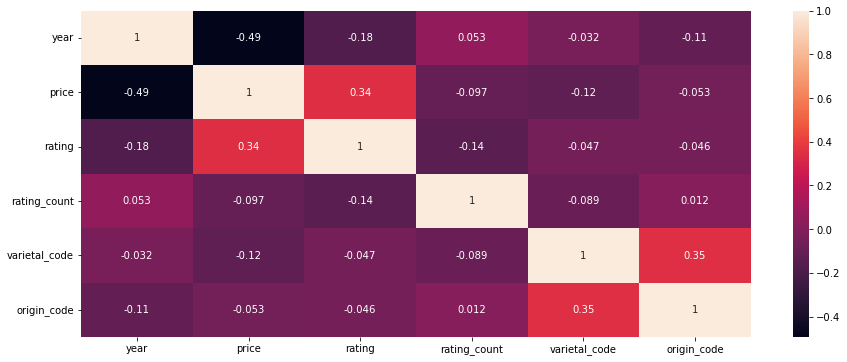

In [14]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

### We can see a correlation between the origin and the variety of the wine, and also a correlation between the price and the rating

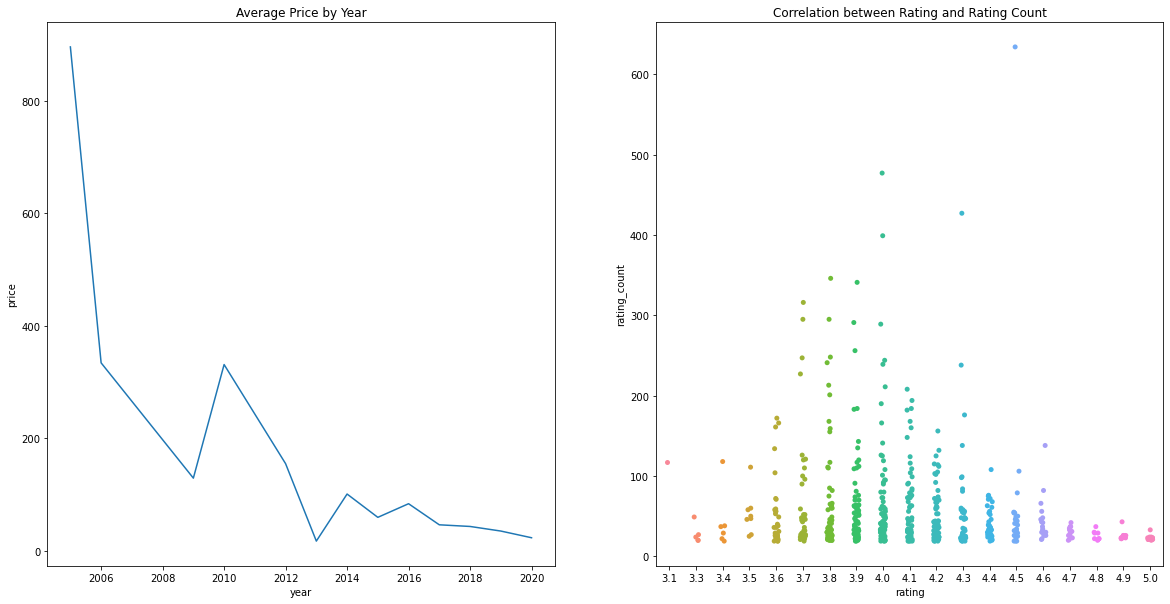

In [15]:
price_by_year = df.groupby('year')['price'].mean().reset_index()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
sns.lineplot(x=price_by_year['year'], y=price_by_year['price'], ax=ax1)
ax1.set_title('Average Price by Year')
sns.stripplot(data=df, x="rating", y="rating_count",ax=ax2)
ax2.set_title('Correlation between Rating and Rating Count')
plt.show()

### The older the wine, the higher the price

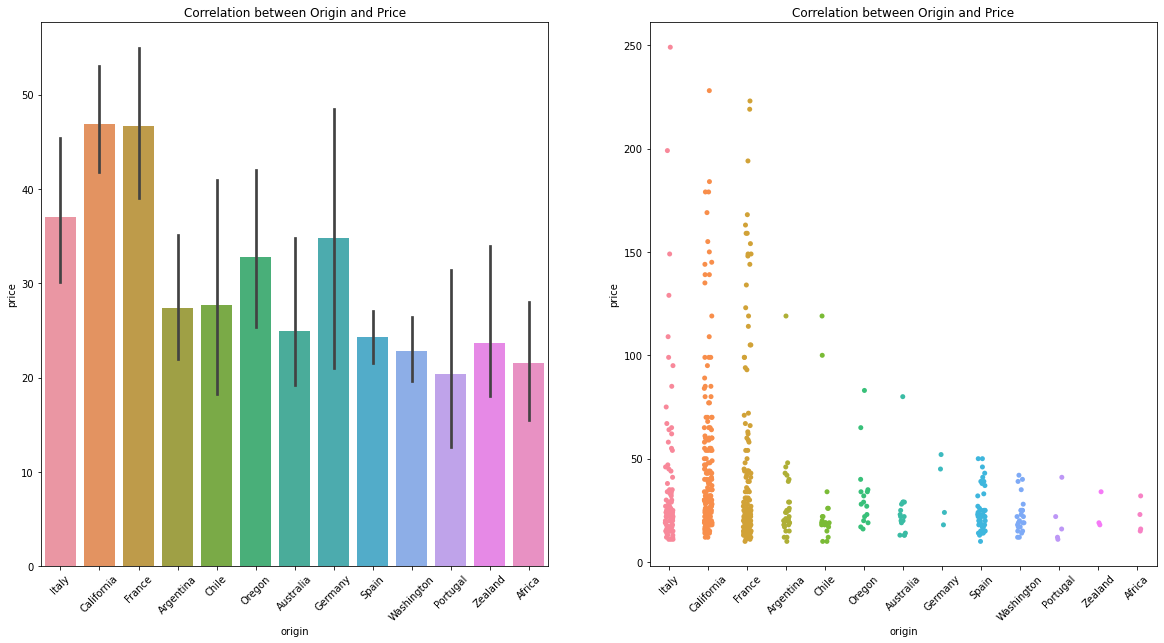

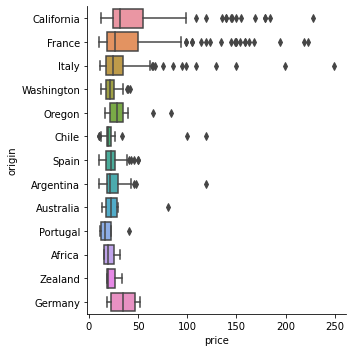

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
df_filtered = df.drop(df[df.price >= 250].index)
df_filtered = df_filtered.sort_values(by='price', ascending=False)
sns.barplot(x = 'origin', y = 'price', data = df_filtered,ax=ax1)
sns.stripplot(data=df_filtered, x="origin", y="price",ax=ax2)
ax1.set_title('Correlation between Origin and Price')
ax2.set_title('Correlation between Origin and Price')

sns.catplot(data=df.drop(df[df.price >= 250].index), x="price", y="origin",kind="box")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
plt.show()

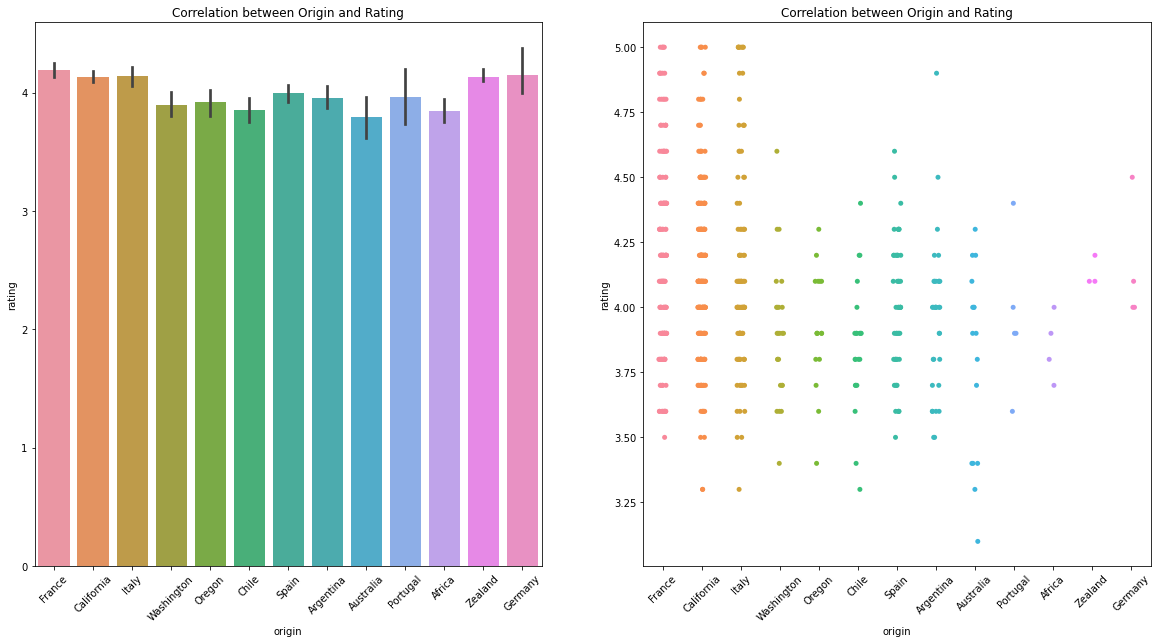

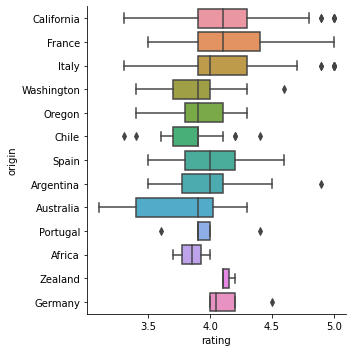

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
sns.barplot(x = 'origin', y = 'rating', data = df,ax=ax1)
sns.stripplot(data=df, x="origin", y="rating",ax=ax2)
ax1.set_title('Correlation between Origin and Rating')
ax2.set_title('Correlation between Origin and Rating')
sns.catplot(data=df.drop(df[df.price >= 250].index), x="rating", y="origin",kind="box")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
plt.show()

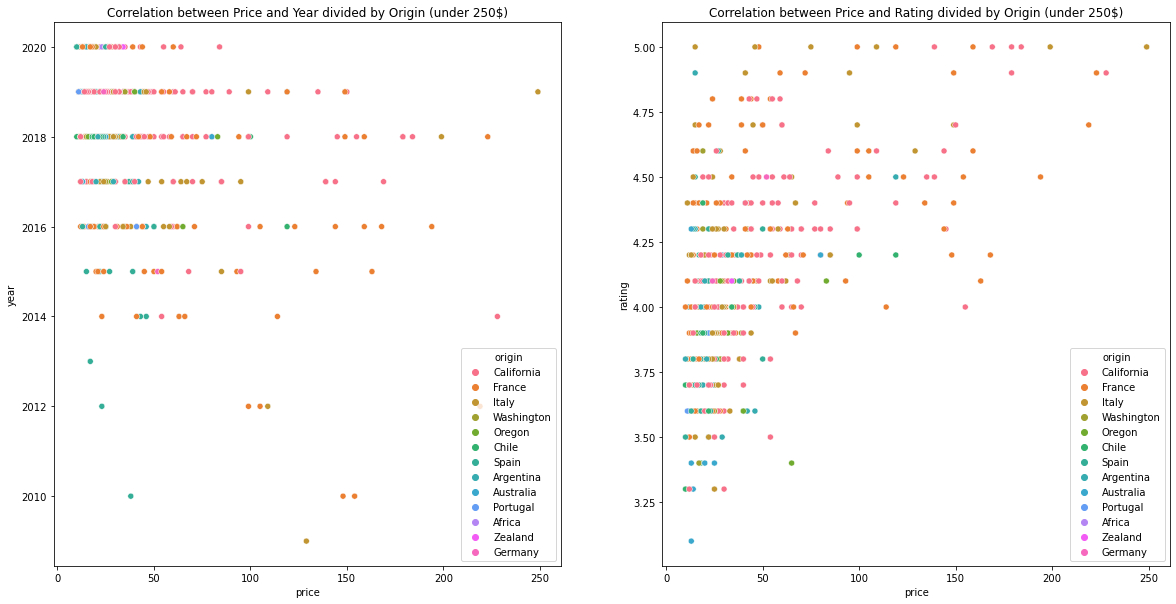

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.scatterplot(data=df.drop(df[df.price >= 250].index), x="price", y="year",hue="origin",ax =ax1)
sns.scatterplot(data=df.drop(df[df.price >= 250].index), x="price", y="rating",hue="origin",ax =ax2)
ax1.set_title('Correlation between Price and Year divided by Origin (under 250$)')
ax2.set_title('Correlation between Price and Rating divided by Origin (under 250$)')
plt.show()

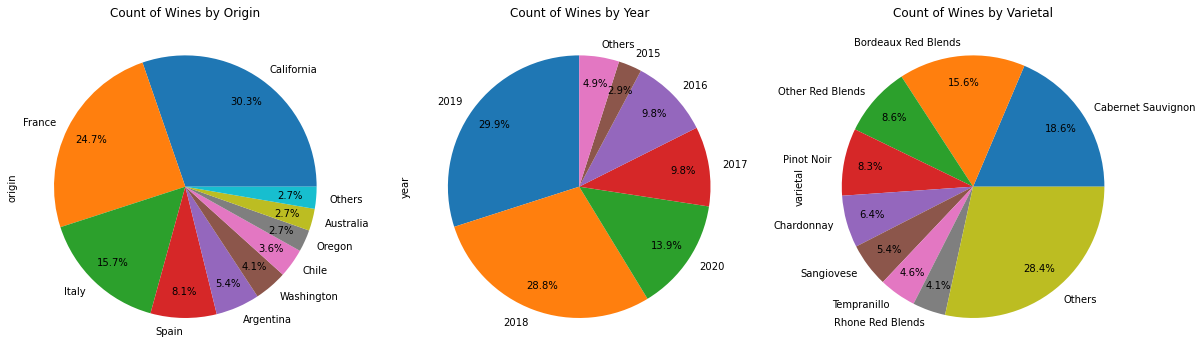

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,10))

df_origin = df['origin'].value_counts()
others = df_origin[df_origin <= df_origin.sum() * 0.01].sum()
df_origin = df_origin[df_origin > df_origin.sum() * 0.01]
df_origin['Others'] = others
df_origin.plot.pie(y='origin', figsize=(8, 8),subplots=True,autopct='%1.1f%%', pctdistance=0.8,ax=ax1)

df_year = df['year'].value_counts()
others = df_year[df_year <= df_year.sum() * 0.02].sum()
df_year = df_year[df_year > df_year.sum() * 0.02]
df_year['Others'] = others
df_year.plot.pie(y='year', figsize=(8, 8),subplots=True,autopct='%1.1f%%', pctdistance=0.8,ax=ax2,startangle=90)

df_varietal = df['varietal'].value_counts()
others = df_varietal[df_varietal <= df_varietal.sum() * 0.04].sum()
df_varietal = df_varietal[df_varietal > df_varietal.sum() * 0.04]
df_varietal['Others'] = others
df_varietal.plot.pie(figsize=(5, 10),subplots=True,autopct='%1.1f%%', pctdistance=0.8,ax=ax3)

ax1.set_title("Count of Wines by Origin")
ax2.set_title('Count of Wines by Year')
ax3.set_title('Count of Wines by Varietal')
plt.show()

### Most of the wine is made in California
### The best-selling wine is from 2019
### The most common varietal is Cabernet Sauvignon

# Setting up everything for machine learning

**Divide into independent and dependent variables**

In [20]:
X = df.drop(columns=['rating','product_name','varietal','origin'])
y = df['rating']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Classify function takes a model, a set of training data (x_train and y_train), and a set of test data (x_test and y_test) as input, and it performs several tasks related to evaluating the performance of the model**

In [21]:
def classify(model, x_train, x_test, y_train, y_test):
    # train the model
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    print("Accuracy:", accuracy * 100)
    y_pred = model.predict(x_test)
    # evaluate the model using mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae)
    score = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    print("CV Score:", np.mean(score)*-1)
    plt.scatter(y_pred, y_test, c='red', alpha=0.5, s=50, label='Predicted values')
    plt.scatter(y_test, y_pred, c='blue', alpha=0.5, s=50, label='True values')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.title('Predicted vs. true values')
    plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
    plt.show()
    return model, y_pred, mae

# Starting machine learning

**Linear Regression**

Accuracy: 16.34390744523212
Mean Absolute Error: 0.2764109524268465
CV Score: 0.26668069356930824


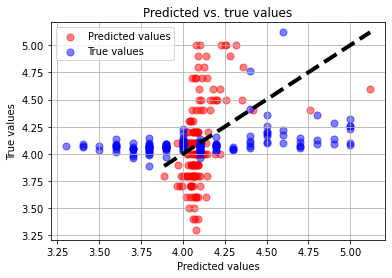

In [22]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
trained_model, y_pred_lr , accuracy_lr = classify(LinearRegression, x_train, x_test, y_train, y_test)

**Decision Tree Regressor**

Accuracy: -2.1415444854536947
Mean Absolute Error: 0.2972972972972973
CV Score: 0.2952285999145422


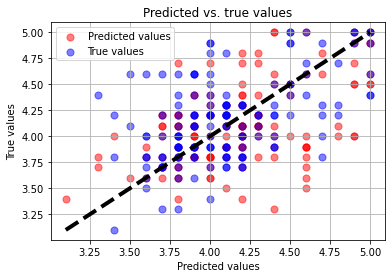

In [23]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor = DecisionTreeRegressor()
trained_model, y_pred_dt , accuracy_dt = classify(DecisionTreeRegressor, x_train, x_test, y_train, y_test)

**Random Forest Regressor**

Accuracy: 44.70484573307192
Mean Absolute Error: 0.2270878378378378
CV Score: 0.22185412334425303


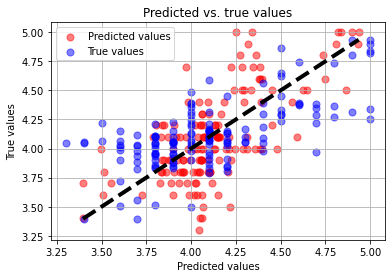

In [24]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
trained_model, y_pred_rf , accuracy_rf = classify(random_forest, x_train, x_test, y_train, y_test)

**Extra Trees Regressor**

Accuracy: 37.96377259057003
Mean Absolute Error: 0.2356216216216218
CV Score: 0.2286233157669848


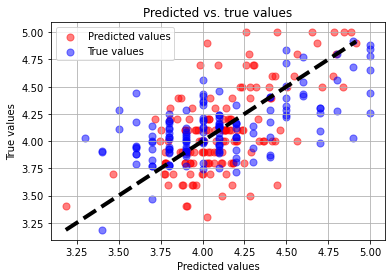

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
extra_trees_model = ExtraTreesRegressor()
trained_model, y_pred_et , accuracy_et = classify(extra_trees_model, x_train, x_test, y_train, y_test)

**SVR**

Accuracy: 3.6901704368109356
Mean Absolute Error: 0.2699976245885391
CV Score: 0.2615540452385313


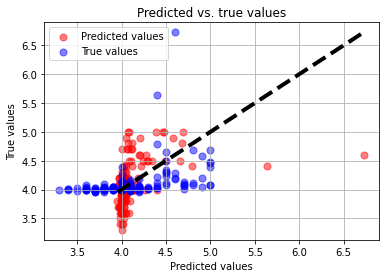

In [26]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear')
trained_model, y_pred_sv , accuracy_sv = classify(svr_model, x_train, x_test, y_train, y_test)

**K Neighbors Regressor**

Accuracy: 34.06084485884644
Mean Absolute Error: 0.2497297297297298
CV Score: 0.2381515453639082


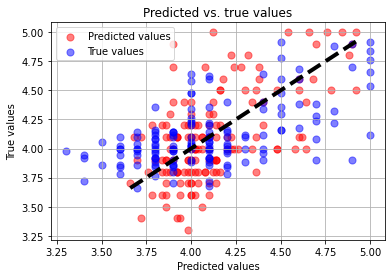

In [27]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
trained_model, y_pred_lr , accuracy_lr = classify(knn_model, x_train, x_test, y_train, y_test)

**We are unable to use those models because they are inaccurate. We will try to find a new approach!**

# Setting up everything for machine learning

**Create a new column called quality in the DataFrame, which contains the labels for the categories that each value in the rating column belongs to**

In [28]:
df['rating'].value_counts()
names = ['poor', 'high']
bins = (3.0, 4.1, 5.0)
df['quality'] = pd.cut(df['rating'], bins = bins, labels = names)
df

,product_name,year,varietal,origin,price,rating,rating_count,varietal_code,origin_code,quality
0,Dom Perignon Vintage with Gift Box,2012,Vintage Sparkling Wine,France,269,4.8,37,34,5,high
1,Robert Mondavi To Kalon Vineyard Reserve Caber...,2017,Cabernet Sauvignon,California,144,4.6,34,4,3,high
2,Chateau Fonbadet B de Fonbadet,2019,Bordeaux Red Blends,France,24,3.8,31,1,5,poor
3,Joseph Phelps Cabernet Sauvignon,2019,Cabernet Sauvignon,California,89,4.5,46,4,3,high
4,Stag's Leap Wine Cellars Artemis Cabernet Sauv...,2019,Cabernet Sauvignon,California,77,4.4,72,4,3,high
...,...,...,...,...,...,...,...,...,...,...
586,Tikal Patriota,2018,Other Red Blends,Argentina,21,3.8,33,18,1,poor
587,Vigilance Cimarron,2017,Other Red Blends,California,12,3.7,120,18,3,poor
588,William Hill North Coast Cabernet Sauvignon,2019,Cabernet Sauvignon,California,14,3.9,34,4,3,poor
589,Selbach Oster Mosel Dry Pinot Blanc,2019,Pinot Blanc,Germany,24,4.1,40,21,6,poor


**Display a bar chart that shows the counts of each category in the quality column of the DataFrame**

Text(0.5, 1.0, 'Quality of Wine')

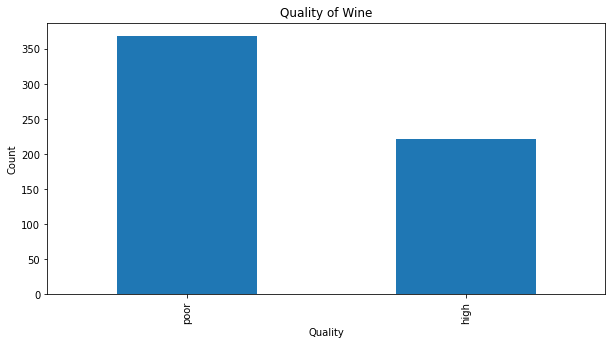

In [29]:
df['quality'].value_counts().plot.bar(figsize=(10, 5))

# add labels and a title
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Quality of Wine')

**Convert the values in the quality column of the DataFrame to numerical values**

In [30]:
df['quality'] = df['quality'].replace({'high': 1, 'poor': 0})
df

,product_name,year,varietal,origin,price,rating,rating_count,varietal_code,origin_code,quality
0,Dom Perignon Vintage with Gift Box,2012,Vintage Sparkling Wine,France,269,4.8,37,34,5,1
1,Robert Mondavi To Kalon Vineyard Reserve Caber...,2017,Cabernet Sauvignon,California,144,4.6,34,4,3,1
2,Chateau Fonbadet B de Fonbadet,2019,Bordeaux Red Blends,France,24,3.8,31,1,5,0
3,Joseph Phelps Cabernet Sauvignon,2019,Cabernet Sauvignon,California,89,4.5,46,4,3,1
4,Stag's Leap Wine Cellars Artemis Cabernet Sauv...,2019,Cabernet Sauvignon,California,77,4.4,72,4,3,1
...,...,...,...,...,...,...,...,...,...,...
586,Tikal Patriota,2018,Other Red Blends,Argentina,21,3.8,33,18,1,0
587,Vigilance Cimarron,2017,Other Red Blends,California,12,3.7,120,18,3,0
588,William Hill North Coast Cabernet Sauvignon,2019,Cabernet Sauvignon,California,14,3.9,34,4,3,0
589,Selbach Oster Mosel Dry Pinot Blanc,2019,Pinot Blanc,Germany,24,4.1,40,21,6,0


**Divide into independent and dependent variables**

In [31]:
X = df.drop(columns=['rating','product_name','varietal','origin','quality'])
y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Classify function takes a model, a set of training data (x_train and y_train), and a set of test data (x_test and y_test) as input, and it performs several tasks related to evaluating the performance of the model**

In [32]:
def classify(model, x_train, x_test, y_train, y_test):
    # train the model
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    print("Accuracy:", accuracy * 100)
    y_pred = model.predict(x_test)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)
    matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(matrix, columns=['0', '1'])
    sns.heatmap(matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.figure(figsize=(5,5))
    plt.show()
    
    return model, y_pred, accuracy

In [33]:
models = []
models_accuracies = []


# Starting machine learning

**Logistic Regression**

Accuracy: 77.7027027027027
CV Score: 76.80102549494373


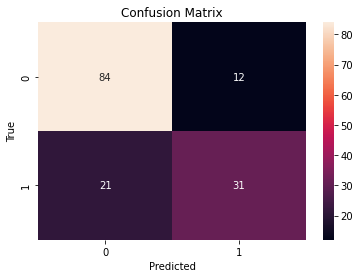

<Figure size 360x360 with 0 Axes>

In [34]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
trained_model, y_pred_lr , accuracy_lr = classify(logistic_regression, x_train, x_test, y_train, y_test)
models.append(trained_model)
models_accuracies.append(accuracy_lr)

**Decision Tree Classifier**

Accuracy: 60.13513513513513
CV Score: 67.16849451645064


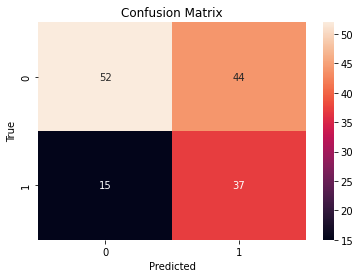

<Figure size 360x360 with 0 Axes>

In [35]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
trained_model, y_pred_dt , accuracy_dt = classify(decision_tree, x_train, x_test, y_train, y_test)
models.append(trained_model)
models_accuracies.append(accuracy_dt)

**Random Forest Classifier**

Accuracy: 74.32432432432432
CV Score: 76.63865546218487


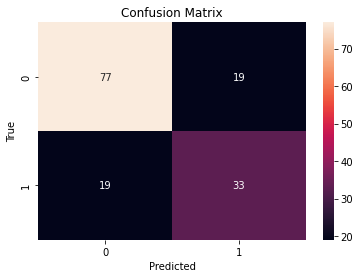

<Figure size 360x360 with 0 Axes>

In [36]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
trained_model, y_pred_rf , accuracy_rf = classify(random_forest, x_train, x_test, y_train, y_test)
models.append(trained_model)
models_accuracies.append(accuracy_rf)

**Extra Trees Classifier**

Accuracy: 75.67567567567568
CV Score: 74.60333285856716


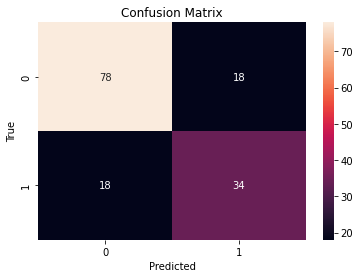

<Figure size 360x360 with 0 Axes>

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees_model = ExtraTreesClassifier()
trained_model, y_pred_et , accuracy_et = classify(extra_trees_model, x_train, x_test, y_train, y_test)
models.append(trained_model)
models_accuracies.append(accuracy_et)

**Multi-layer Perceptron classifier**

Accuracy: 75.0
CV Score: 75.1089588377724


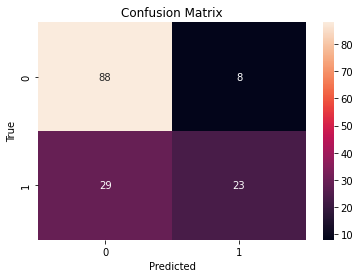

<Figure size 360x360 with 0 Axes>

In [38]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier()
trained_model, y_pred_lr , accuracy_lr = classify(nn_model, x_train, x_test, y_train, y_test)
models.append(trained_model)
models_accuracies.append(accuracy_lr)

**Support Vector Classifier**

Accuracy: 77.02702702702703
CV Score: 76.12021079618287


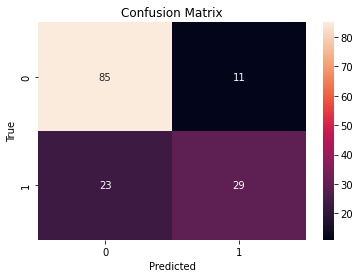

<Figure size 360x360 with 0 Axes>

In [39]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
trained_model, y_pred_lr , accuracy_lr = classify(svm_model, x_train, x_test, y_train, y_test)
models.append(trained_model)
models_accuracies.append(accuracy_lr)

**K Neighbors Classifier**

Accuracy: 79.05405405405406
CV Score: 75.28272325879503


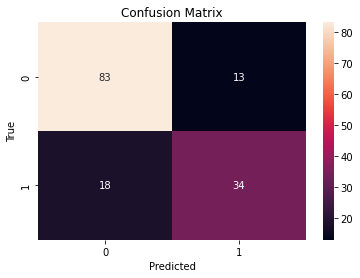

<Figure size 360x360 with 0 Axes>

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
trained_model, y_pred_lr , accuracy_lr = classify(knn_model, x_train, x_test, y_train, y_test)
models.append(trained_model)
models_accuracies.append(accuracy_lr)

**Display a summary of the results of training and evaluating several machine learning models**

In [41]:
models_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Extra Trees', 'MLP', 'SVC', 'K Neighbors']
for model, acc in zip(models_names, models_accuracies):
    print(f'Model: {model}, score: {acc} ')

Model: Logistic Regression, score: 0.777027027027027 
Model: Decision Tree, score: 0.6013513513513513 
Model: Random Forest, score: 0.7432432432432432 
Model: Extra Trees, score: 0.7567567567567568 
Model: MLP, score: 0.75 
Model: SVC, score: 0.7702702702702703 
Model: K Neighbors, score: 0.7905405405405406 


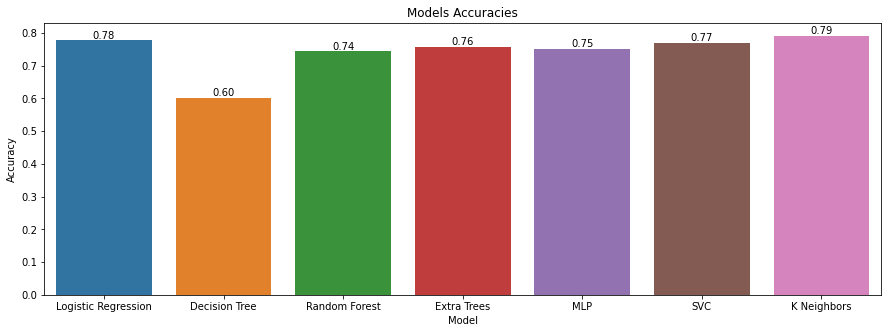

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x=models_names, y=models_accuracies)
for i, v in enumerate(models_accuracies):
    plt.text(i, v, f"{v:.2f}", va="bottom", ha="center")
plt.title('Models Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

**Contain the trained machine learning model that achieved the highest accuracy score among all of the models in the models list**

In [43]:
max_index = models_accuracies.index(max(models_accuracies))
best_model = models[max_index]
best_model

KNeighborsClassifier()

**Take a DataFrame and a trained machine learning model, and it returns the DataFrame with a new column called 'predicted_quality' that contains the predicted quality of each wine product in the DataFrame**

In [44]:
def predict_quality(wine_df, model):
    
    varietal_code_map = df.groupby('varietal')['varietal_code'].first().to_dict()
    wine_df['varietal_code'] = wine_df['varietal'].map(varietal_code_map)
    origin_code_map = df.groupby('origin')['origin_code'].first().to_dict()
    wine_df['origin_code'] = wine_df['origin'].map(origin_code_map)
    X = wine_df[['year', 'price','rating_count', 'varietal_code', 'origin_code']]
    y_pred = model.predict(X)
    wine_df['predicted_quality'] = y_pred
    wine_df.drop(columns=['varietal_code', 'origin_code'], inplace=True)
    wine_df['predicted_quality'] = wine_df['predicted_quality'].replace({1: 'high', 0: 'poor'})
    return wine_df

In [45]:
data = {
    'product_name': ['Wine 1', 'Wine 2', 'Wine 3', 'Wine 4', 'Wine 5', 'Wine 6'],
    'year': [2011, 2012, 2014, 2020, 2015, 2018],
    'varietal': ['Other Red Blends', 'Vintage Sparkling Wine', 'Bordeaux Red Blends', 'Bordeaux Red Blends', 'Other Red Blends', 'Pinot Blanc'],
    'origin': ['Argentina', 'France', 'France', 'Chile', 'Oregon', 'Germany'],
    'price': [70, 269, 102, 121, 30 , 70],
    'rating_count': [76, 37, 365, 34, 24, 20]
}
wine_df = pd.DataFrame(data)


**Predict the quality of a DataFrame**

In [46]:
wine_df= predict_quality(wine_df,best_model)
wine_df

,product_name,year,varietal,origin,price,rating_count,predicted_quality
0,Wine 1,2011,Other Red Blends,Argentina,70,76,high
1,Wine 2,2012,Vintage Sparkling Wine,France,269,37,high
2,Wine 3,2014,Bordeaux Red Blends,France,102,365,poor
3,Wine 4,2020,Bordeaux Red Blends,Chile,121,34,high
4,Wine 5,2015,Other Red Blends,Oregon,30,24,poor
5,Wine 6,2018,Pinot Blanc,Germany,70,20,high
